In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carregar dados
df = pd.read_csv('/content/drive/MyDrive/analises/dataset.csv')

In [ ]:
# Checar carregamento
df.head(5)

,ID,Timestamp,SensorReading,MachineStatus,QualityCheck,ProductCount
0,1,2023-11-22 09:24:28.749389,43.081004,Standby,True,21
1,2,2023-11-21 09:24:28.749396,71.312491,On,True,18
2,3,2023-11-20 09:24:28.749399,19.096745,Standby,False,10
3,4,2023-11-19 09:24:28.749400,28.951475,On,True,24
4,5,2023-11-18 09:24:28.749401,46.283914,Standby,True,23


In [ ]:
# Definir os limites de especificação (LSL e USL)
LSL = 22.5  # Limite inferior de especificação
USL = 75.4  # Limite superior de especificação

In [ ]:
# Cálculos de Capabilidade
# Média, desvio padrão, Cp e Cpk
media = df['SensorReading'].mean()
despad = df['SensorReading'].std()

Cp = (USL - LSL) / (6 * despad)
Cpk = min((USL - media) / (3 * despad), (media - LSL) / (3 * despad))

# Resultados
print(f'Média: {media}')
print(f'Desvio Padrão: {despad}')
print(f'Cp: {Cp}')
print(f'Cpk: {Cpk}')
print()

if Cp >= 1.33 and Cpk >= 1.33:
    print("O processo é considerado capaz.")
elif Cp >= 1.0 and Cpk >= 1.0:
    print("O processo é marginalmente capaz.")
else:
    print("O processo não é capaz.")

Média: 51.505139194074566
Desvio Padrão: 29.070130212745823
Cp: 0.3032895484864733
Cpk: 0.27399098468719296

O processo não é capaz.


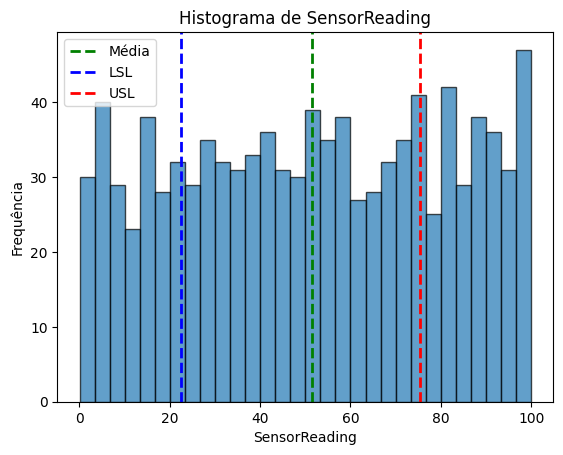

In [ ]:
# Visualização

plt.hist(df['SensorReading'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(media, color='green', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(LSL, color='blue', linestyle='dashed', linewidth=2, label='LSL')
plt.axvline(USL, color='red', linestyle='dashed', linewidth=2, label='USL')
plt.title('Histograma de SensorReading')
plt.xlabel('SensorReading')
plt.ylabel('Frequência')
plt.legend()
plt.show()